<img src="Images/new foot.png" width="100%">

# Heart Disease Prediction using Logistic Regression 
<img src="Images/heart.jpg" width="60%">

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Database information 
There are 10 variables:
 + sbp: Systolic blood pressure
 + tobacco: Cumulative tobacco consumption, in kg
 + ldl: Low-density lipoprotein cholesterol
 + adiposity: Adipose tissue concentration
 + famhist: Family history of heart disease (1=Present, 0=Absent)
 + typea: Score on test designed to measure type-A behavior
 + obesity: Obesity
 + alcohol: Current consumption of alcohol
 + age: Age of subject
 + chd: Coronary heart disease at baseline; 1=Yes 0=No


In [2]:
df = pd.read_csv("./Datasets/heart.csv")
df.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


#### Converting categorical varibales into numbers

In [3]:
history_mapping = {'Absent': 0,'Present': 1}
df["famhist"] = df["famhist"].map(history_mapping)

df.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1


## Data Analysis 

In [4]:
import seaborn as sns
sns.set(style='whitegrid', context='notebook')
cols = ['sbp','tobacco','ldl','adiposity','famhist','typea','obesity', 'alcohol','age', 'chd']

In [5]:
import numpy as np

cm = np.corrcoef(df[cols].values.T)
cm

array([[ 1.        ,  0.21224652,  0.15829633,  0.35650008,  0.08564531,
        -0.05745431,  0.23806661,  0.14009559,  0.3887706 ,  0.19235411],
       [ 0.21224652,  1.        ,  0.15890546,  0.28664037,  0.08860143,
        -0.01460788,  0.12452941,  0.20081339,  0.45033016,  0.29971754],
       [ 0.15829633,  0.15890546,  1.        ,  0.44043175,  0.16135306,
         0.04404758,  0.33050586, -0.0334034 ,  0.31179923,  0.26305268],
       [ 0.35650008,  0.28664037,  0.44043175,  1.        ,  0.18172101,
        -0.04314364,  0.71655625,  0.10033013,  0.62595442,  0.25412139],
       [ 0.08564531,  0.08860143,  0.16135306,  0.18172101,  1.        ,
         0.04480858,  0.11559508,  0.08051969,  0.23966742,  0.27237273],
       [-0.05745431, -0.01460788,  0.04404758, -0.04314364,  0.04480858,
         1.        ,  0.0740061 ,  0.03949794, -0.10260632,  0.10315583],
       [ 0.23806661,  0.12452941,  0.33050586,  0.71655625,  0.11559508,
         0.0740061 ,  1.        ,  0.05161957

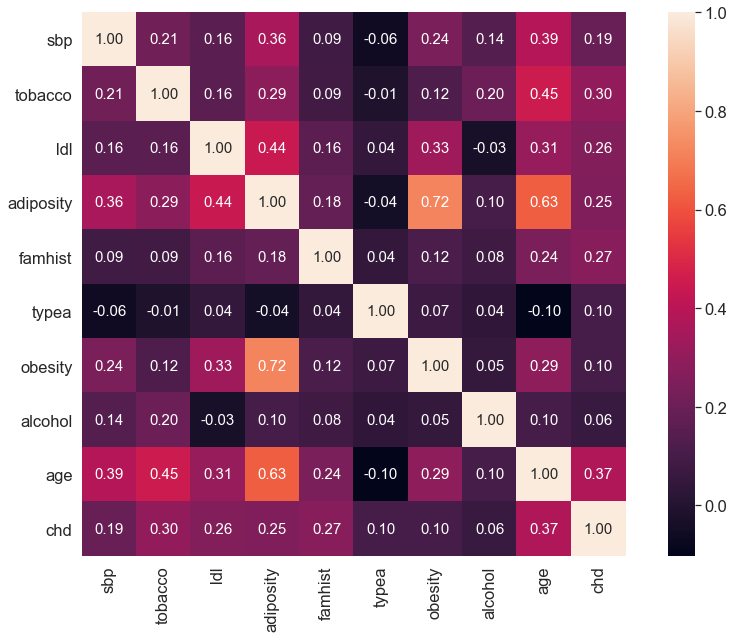

In [8]:
f, ax = plt.subplots(figsize=(15, 10))
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=cols,
                 xticklabels=cols)

plt.show()

# Time for Machine Learning 

### Preparing inputs and outputs 

In [9]:
X=df[['tobacco','ldl','adiposity','famhist','typea','obesity', 'alcohol','age']].values
y=df[['chd']].values 

### Prepare Training and Test deta sets 

In [10]:
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Apply Logisitc Regression 

In [11]:
from sklearn.linear_model import LogisticRegression

In [24]:
model = LogisticRegression( C=100, penalty='l2',solver='liblinear')

model.fit(X_train, y_train)

C:\Users\asifi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(C=100, solver='liblinear')

In [25]:
model.score(X_train, y_train)

0.7337461300309598

### Reporting accuracy 

In [26]:
print ('Training Accuracy: %.2f' % model.score(X_train,y_train))
print ('Test Accuracy: %.2f' % model.score(X_test,y_test))
        

Training Accuracy: 0.73
Test Accuracy: 0.73
